In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [11]:
df = pd.read_csv('data/heart_disease_uci.csv')

One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

In [19]:
pazienti_non_malati = df[df['num'] == 0]
pazienti_malati = df[df['num'] != 0]

pazienti_malati['num'].isnull().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


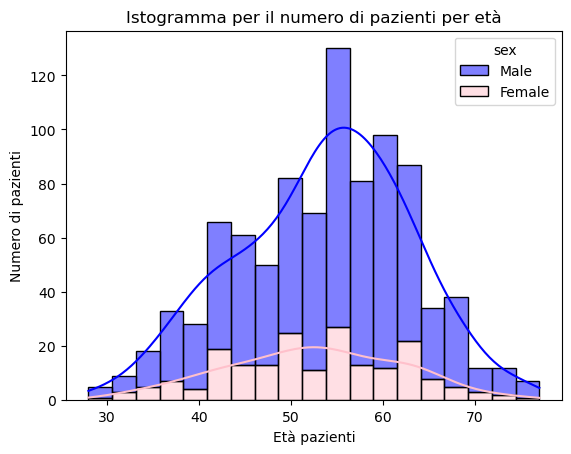

In [13]:
# Draw a histogram to check the distribution of age column

histplot = sns.histplot(data=df, x='age', hue='sex', multiple='stack', palette={'Male': 'blue', 'Female': 'pink'}, kde=True)

# Impostiamo le etichette degli assi
histplot.set_xlabel("Età pazienti")
histplot.set_ylabel("Numero di pazienti")

# Impostiamo il titolo del grafico
histplot.set_title('Istogramma per il numero di pazienti per età')

# Mostriamo il grafico
plt.show()

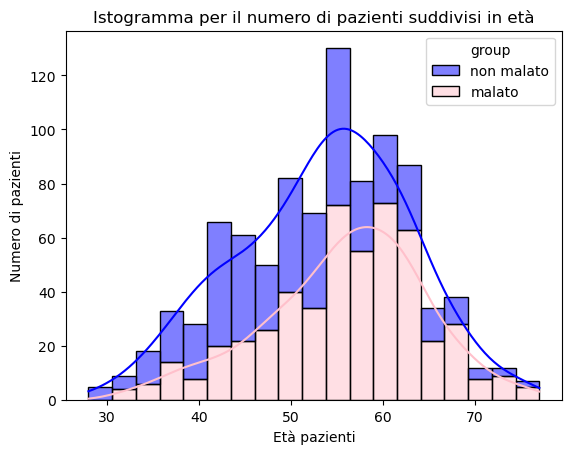

In [14]:
df['group'] = df['num'].apply(lambda x: 'non malato' if x == 0 else 'malato')

histplot = sns.histplot(data=df, x='age', hue='group', multiple='stack', palette={'non malato': 'blue', 'malato': 'pink'}, kde=True)

# Impostiamo le etichette degli assi
histplot.set_xlabel("Età pazienti")
histplot.set_ylabel("Numero di pazienti")

# Impostiamo il titolo del grafico
histplot.set_title('Istogramma per il numero di pazienti suddivisi in età')

# Mostriamo il grafico
plt.show()

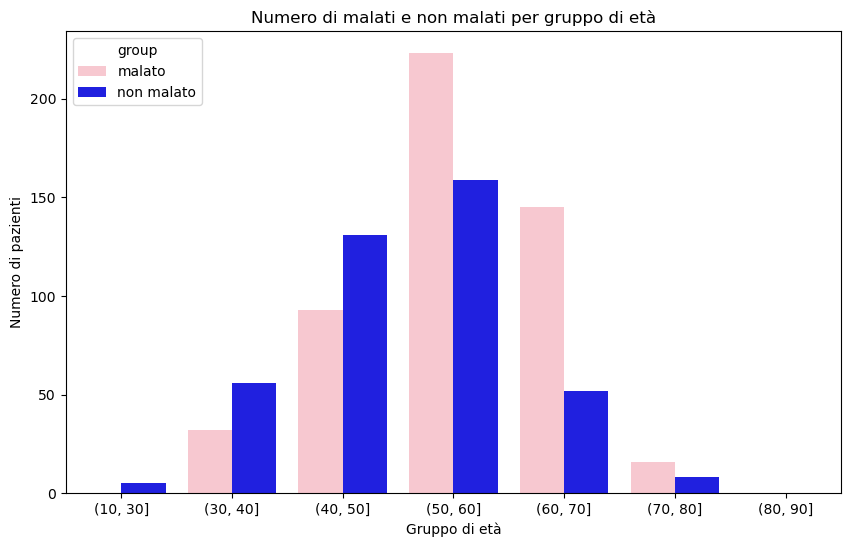

In [15]:
age_bins = [10, 30, 40, 50, 60, 70, 80, 90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Contiamo il numero di malati e non malati in ciascun intervallo di età
age_group_counts = pd.crosstab(df['age_group'], df['group'])

# Resettiamo l'indice per facilitare la creazione del grafico
age_group_counts = age_group_counts.reset_index()

# Creiamo il grafico a barre
age_group_counts_melted = age_group_counts.melt(id_vars='age_group', value_vars=['malato', 'non malato'],
                                                var_name='group', value_name='count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=age_group_counts_melted, x='age_group', y='count', hue='group',
                      palette={'non malato': 'blue', 'malato': 'pink'})

# Impostiamo le etichette degli assi
barplot.set_xlabel("Gruppo di età")
barplot.set_ylabel("Numero di pazienti")

# Impostiamo il titolo del grafico
barplot.set_title('Numero di malati e non malati per gruppo di età')

# Mostriamo il grafico
plt.show()

In [16]:
age_bins = np.arange(49, 701, 50)
df['chol_group'] = pd.cut(df['chol'], bins=age_bins)

# Contiamo il numero di malati e non malati in ciascun intervallo di età
age_group_counts = pd.crosstab(df['chol_group'], df['group'])

age_group_counts


group,malato,non malato
chol_group,,
"(49, 99]",0,1
"(99, 149]",5,9
"(149, 199]",43,70
"(199, 249]",131,152
"(249, 299]",110,92
"(299, 349]",42,36
"(349, 399]",7,7
"(399, 449]",3,2
"(449, 499]",2,2


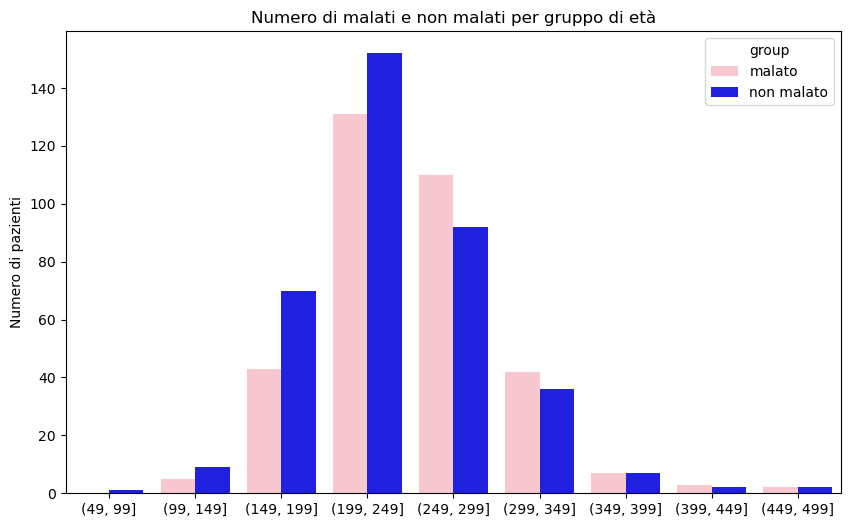

In [17]:
age_bins = np.arange(49, 501, 50)
df['chol_group'] = pd.cut(df['chol'], bins=age_bins)

# Contiamo il numero di malati e non malati in ciascun intervallo di età
age_group_counts = pd.crosstab(df['chol_group'], df['group'])

# Resettiamo l'indice per facilitare la creazione del grafico
age_group_counts = age_group_counts.reset_index()

# Creiamo il grafico a barre
age_group_counts_melted = age_group_counts.melt(id_vars='chol_group', value_vars=['malato', 'non malato'],
                                                var_name='group', value_name='count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=age_group_counts_melted, x='chol_group', y='count', hue='group',
                      palette={'non malato': 'blue', 'malato': 'pink'})

# Impostiamo le etichette degli assi
barplot.set_xlabel("")
barplot.set_ylabel("Numero di pazienti")

# Impostiamo il titolo del grafico
barplot.set_title('Numero di malati e non malati per gruppo di età')

# Mostriamo il grafico
plt.show()

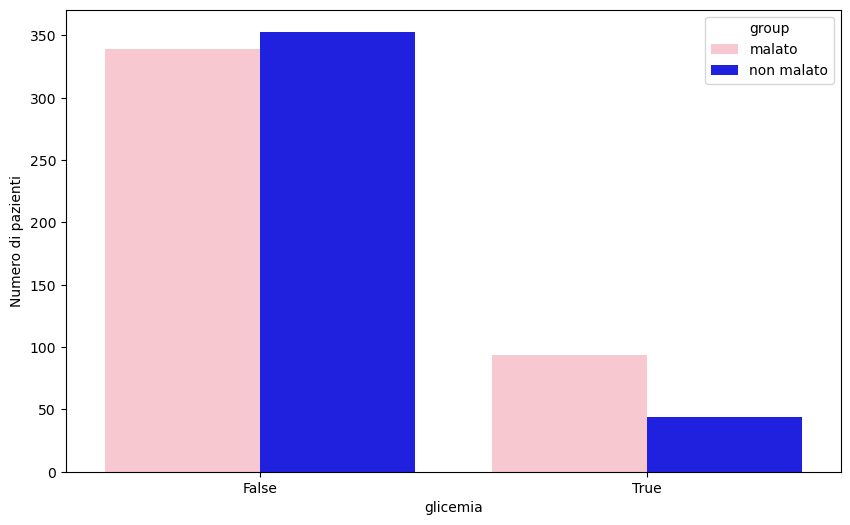

In [85]:
# Contiamo il numero di malati e non malati in ciascun intervallo di età
age_group_counts = pd.crosstab(df['fbs'], df['group'])

# Resettiamo l'indice per facilitare la creazione del grafico
age_group_counts = age_group_counts.reset_index()

# Creiamo il grafico a barre
age_group_counts_melted = age_group_counts.melt(id_vars='fbs', value_vars=['malato', 'non malato'],
                                                var_name='group', value_name='count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=age_group_counts_melted, x='fbs', y='count', hue='group',
                      palette={'non malato': 'blue', 'malato': 'pink'})

# Impostiamo le etichette degli assi
barplot.set_xlabel("glicemia")
barplot.set_ylabel("Numero di pazienti")

# Impostiamo il titolo del grafico
barplot.set_title('')

# Mostriamo il grafico
plt.show()

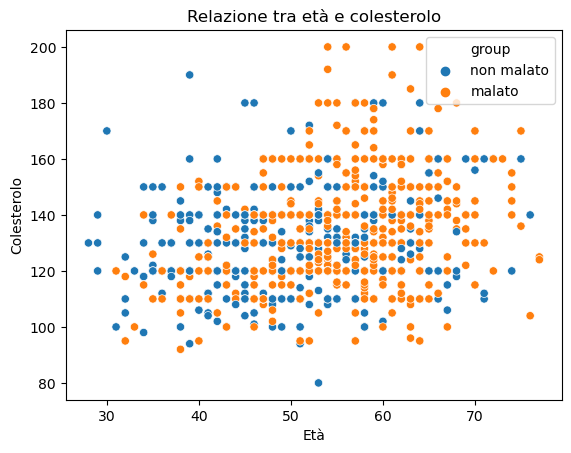

In [75]:
df_senza = df[df['trestbps'] != 0]
sns.scatterplot(x='age', y='trestbps', hue='group', data=df_senza)
plt.title('Relazione tra età e colesterolo')
plt.xlabel('Età')
plt.ylabel('Colesterolo')
plt.show()

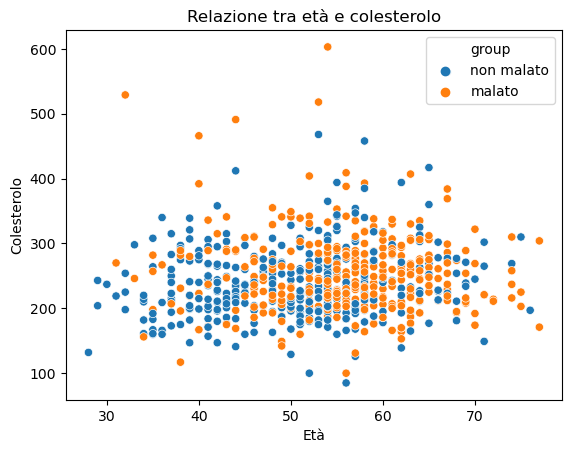

In [78]:
df_senza = df[df['chol'] != 0]
sns.scatterplot(x='age', y='chol', hue='group', data=df_senza)
plt.title('Relazione tra età e colesterolo')
plt.xlabel('Età')
plt.ylabel('Colesterolo')
plt.show()

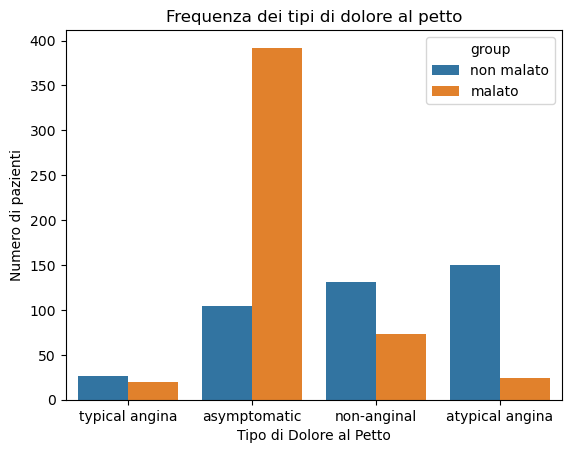

In [87]:
# Grafico a barre per il tipo di dolore al petto
sns.countplot(x='cp', hue='group', data=df)
plt.title('Frequenza dei tipi di dolore al petto')
plt.xlabel('Tipo di Dolore al Petto')
plt.ylabel('Numero di pazienti')
plt.show()

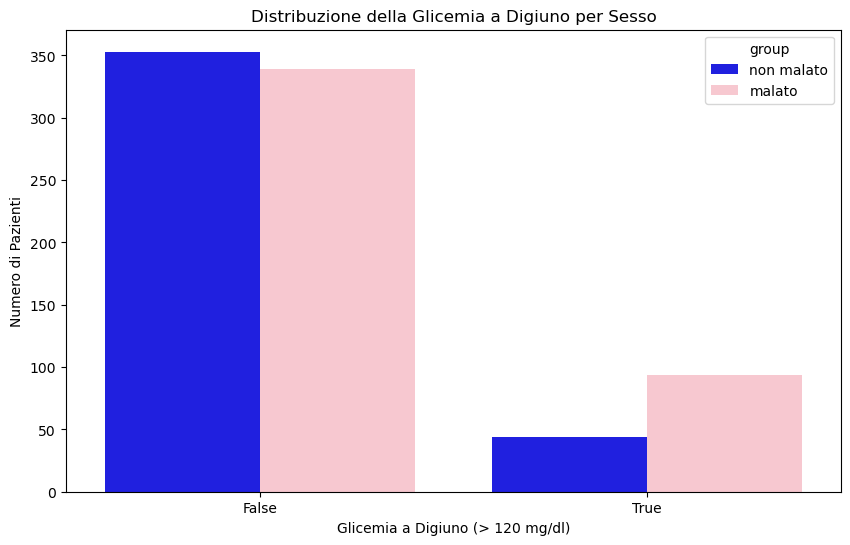

In [25]:

# Controlliamo la distribuzione della glicemia a digiuno (fbs)
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='fbs', hue='group', data=df, palette={'non malato': 'blue', 'malato': 'pink'})

# Impostiamo le etichette degli assi
bar_plot.set_xlabel("Glicemia a Digiuno (> 120 mg/dl)")
bar_plot.set_ylabel("Numero di Pazienti")

# Impostiamo il titolo del grafico
bar_plot.set_title("Distribuzione della Glicemia a Digiuno per Sesso")

# Mostriamo il grafico
plt.show()


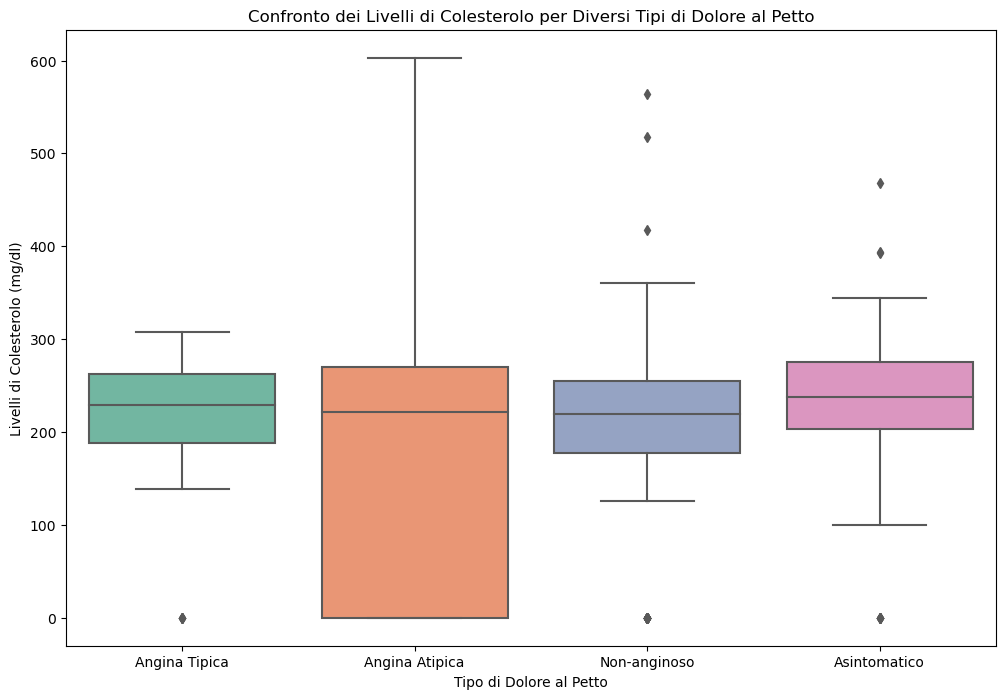

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponiamo che il DataFrame df sia già caricato con i dati pertinenti.
# Esempio di caricamento del dataset (se necessario)
# df = pd.read_csv('path_to_dataset.csv')

# Creiamo un box plot per confrontare i livelli di colesterolo per diversi tipi di dolore al petto
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='cp', y='chol', data=df, palette='Set2')

# Impostiamo le etichette degli assi
box_plot.set_xlabel("Tipo di Dolore al Petto")
box_plot.set_ylabel("Livelli di Colesterolo (mg/dl)")

# Impostiamo il titolo del grafico
box_plot.set_title("Confronto dei Livelli di Colesterolo per Diversi Tipi di Dolore al Petto")

# Impostiamo le etichette per i tipi di dolore al petto
box_plot.set_xticklabels(['Angina Tipica', 'Angina Atipica', 'Non-anginoso', 'Asintomatico'])

# Mostriamo il grafico
plt.show()


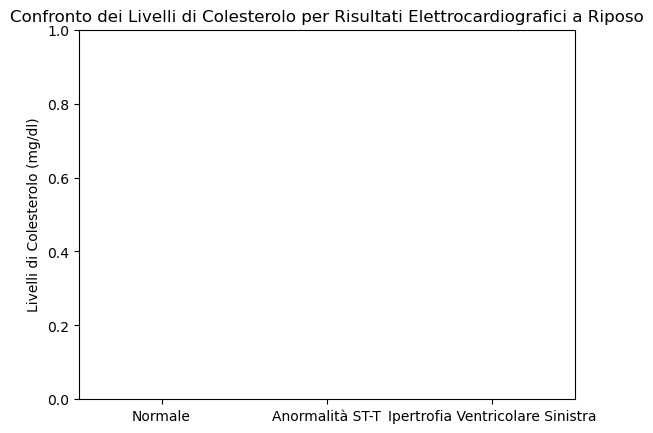

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponiamo che il DataFrame df sia già caricato con i dati pertinenti.
# Esempio di caricamento del dataset (se necessario)
# df = pd.read_csv('path_to_dataset.csv')

# Creiamo un box plot per confrontare i livelli di colesterolo per i risultati elettrocardiografici a riposo
group_count = df.value_counts(df['group'])
box_plot = sns.boxplot(x = df['restecg'], y= group_count, palette='Set2')

# Impostiamo le etichette degli assi
box_plot.set_xlabel("")
box_plot.set_ylabel("Livelli di Colesterolo (mg/dl)")

# Impostiamo il titolo del grafico
box_plot.set_title("Confronto dei Livelli di Colesterolo per Risultati Elettrocardiografici a Riposo")

# Impostiamo le etichette per i risultati elettrocardiografici a riposo
box_plot.set_xticklabels(['Normale', 'Anormalità ST-T', 'Ipertrofia Ventricolare Sinistra'])

# Mostriamo il grafico
plt.show()


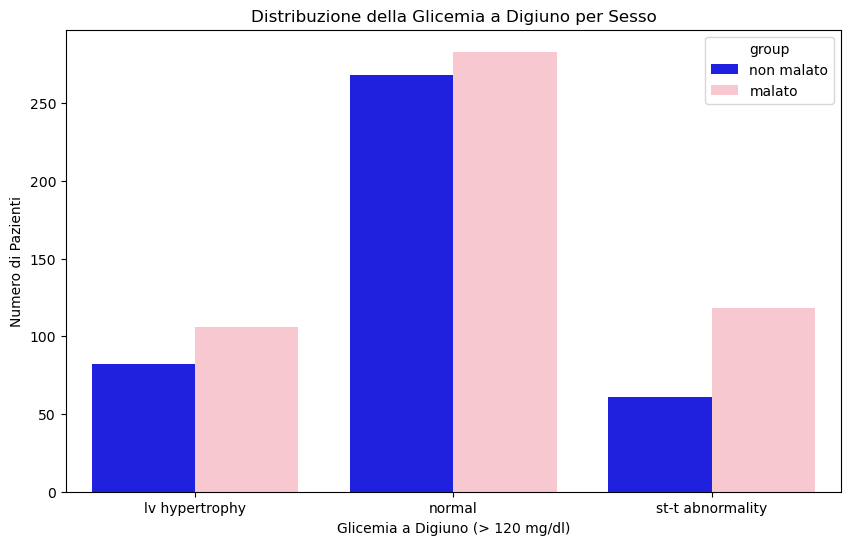

In [37]:

# Controlliamo la distribuzione della glicemia a digiuno (fbs)
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='restecg', hue='group', data=df, palette={'non malato': 'blue', 'malato': 'pink'})

# Impostiamo le etichette degli assi
bar_plot.set_xlabel("Glicemia a Digiuno (> 120 mg/dl)")
bar_plot.set_ylabel("Numero di Pazienti")

# Impostiamo il titolo del grafico
bar_plot.set_title("Distribuzione della Glicemia a Digiuno per Sesso")

# Mostriamo il grafico
plt.show()

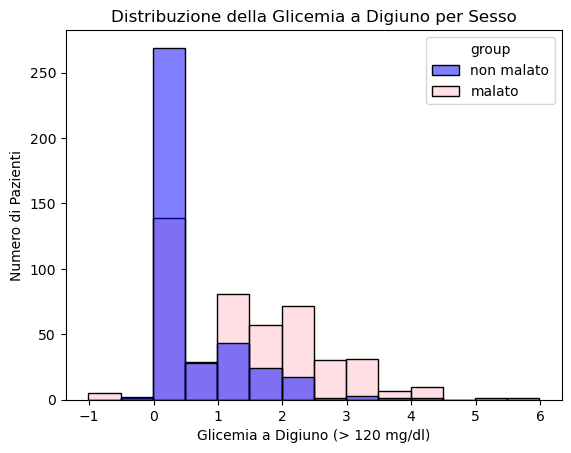

In [58]:
bin = np.arange(-1.01, 6.01, 0.5)
# Controlliamo la distribuzione della glicemia a digiuno (fbs)
bar_plot = sns.histplot(x='oldpeak', hue='group', data=df, palette={'non malato': 'blue', 'malato': 'pink'}, bins = bin)

# Impostiamo le etichette degli assi
bar_plot.set_xlabel("Glicemia a Digiuno (> 120 mg/dl)")
bar_plot.set_ylabel("Numero di Pazienti")

# Impostiamo il titolo del grafico
bar_plot.set_title("Distribuzione della Glicemia a Digiuno per Sesso")

# Mostriamo il grafico
plt.show()

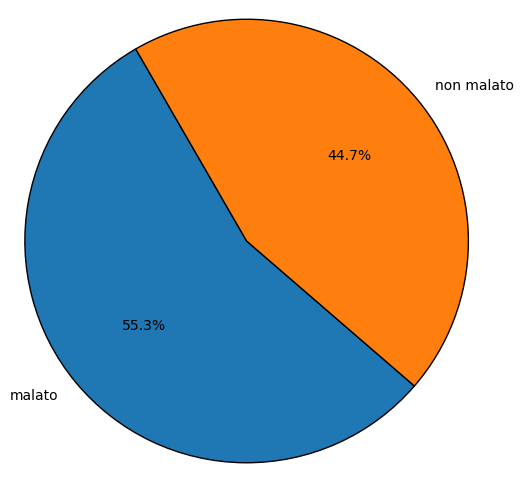

In [53]:
origin_count = df.groupby('group').size()

# Crea il grafico a torta
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(origin_count.values, labels=origin_count.index, autopct='%1.1f%%', startangle=120,
                                  wedgeprops=dict(edgecolor='black'), radius=1.2)

# Personalizza il grafico
plt.setp(autotexts, size=10)

# Mostra il grafico
plt.show()

([<matplotlib.patches.Wedge at 0x7fed8876e880>,
 [Text(-0.5568531341059887, -0.9486382803979281, ''),
  Text(0.5568531341059888, 0.9486382803979281, '')],
 [Text(-0.30373807314872103, -0.5174390620352334, '55.3%'),
  Text(0.3037380731487211, 0.5174390620352334, '44.7%')])

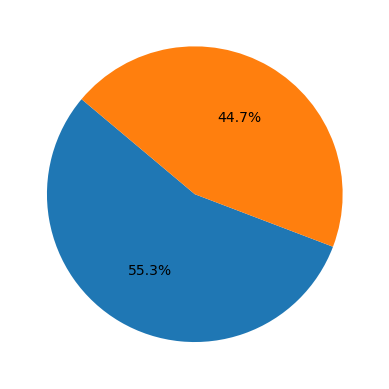

In [48]:
origin_count = df.groupby('group').size()
plt.pie(origin_count, autopct='%1.1f%%', startangle=140)